## By: BENJAMIN JUMA

### Introduction
This is the third project in the data analyst nano-degree program. This project pertains to data viasualization, which is a very fundamental part of data analysis. In this project, i am going explore and visualize one of udacity curated data set (Prosper Loan Data) and presnet my findings. The project is divided into two phases, the exploration and explanatory phase. The former addresses exploratory data visualization while the latter focuses mainly on explanatory data visualization.

#### Pre-requisite importation of all the packages to be used in the project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### Description of the data

In this project, i am using the prosper Loan Data dataset which is basically a loan  data from  prosper. The data set contains over one hundred thousand records with eighty one columns/variables on each record (loan). among these vriables are loan amount- whch is the amount of loan borrowed, borrower rate or interest rate (rate), current loan status, borrower income among many other variables which i shall expore in the due course of this project.

###### loading and assessing the data set

In [7]:
dff=pd.read_csv("C:/Users/triza/Desktop/data analysis/prosperLoanData.csv")
dff.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [8]:
#dff.info()
dff.shape

(113937, 81)

In [11]:
dff.isna().sum()
dff.notna().sum()

ListingKey                     113937
ListingNumber                  113937
ListingCreationDate            113937
CreditGrade                     28953
Term                           113937
                                ...  
PercentFunded                  113937
Recommendations                113937
InvestmentFromFriendsCount     113937
InvestmentFromFriendsAmount    113937
Investors                      113937
Length: 81, dtype: int64

In [12]:

dff. IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

#### Understanig the structure of the data set

The prosper data set has a total of 113937 rows and 81 columns. Each row represet a singe observation (loan) while each column represent a particular variable relating to each loan. Above is the display of the first five rows of the dataset. Furthermore, the data set has variable with different data types. All the variables in the data set togather with information relating to each such as variable types, and number of non-null values of each variable are displayed above. In summery, there are fifty variables of float data types, three bolean data types,eleven integer data types and seventeen variables whose data type is strings. In adition, some variables have missing values, an issue that will be dealt with in the data wrangling step of the project.
With such a brief overview of the data set, lets now dive into some data wrangling porcess so as to prepare our data for analysis.

#### Main features of interest in the data set

Among the variables that i will be much really interested in exploring in this dataset are; 
term, loan status, borrower APR and borower interst rate,lender yield,occupation, employment status, employment status duration, income range, monthly loan payment,recommendations, investors among othe variables which i  may find interesting in the course of my analyses.

In [13]:
 df_clean=dff.copy()
df_clean.ListingCreationDate=pd.to_datetime(df_clean.ListingCreationDate)
df_clean.ClosedDate=pd.to_datetime(df_clean.ClosedDate)
df_clean.head()

ListingKey  ListingNumber     ListingCreationDate CreditGrade  \
0  1021339766868145413AB3B         193129 2007-08-26 19:09:29.263           C   
1  10273602499503308B223C1        1209647 2014-02-27 08:28:07.900         NaN   
2  0EE9337825851032864889A          81716 2007-01-05 15:00:47.090          HR   
3  0EF5356002482715299901A         658116 2012-10-22 11:02:35.010         NaN   
4  0F023589499656230C5E3E2         909464 2013-09-14 18:38:39.097         NaN   

   Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  ...  \
0    36  Completed 2009-08-14      0.16516        0.1580       0.1380  ...   
1    36    Current        NaT      0.12016        0.0920       0.0820  ...   
2    36  Completed 2009-12-17      0.28269        0.2750       0.2400  ...   
3    36    Current        NaT      0.12528        0.0974       0.0874  ...   
4    36    Current        NaT      0.24614        0.2085       0.1985  ...   

   LP_ServiceFees  LP_CollectionFees  LP_GrossPrincipalLoss  \
0         -133.18                0.0                    0.0   
1            0.00                0.0                    0.0   
2          -24.20                0.0                    0.0   
3         -108.01                0.0                    0.0   
4          -60.27                0.0                    0.0   

   LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  PercentFunded  \
0                  0.0                             0.0            1.0   
1                  0.0                             0.0            1.0   
2                  0.0                             0.0            1.0   
3                  0.0                             0.0            1.0   
4                  0.0                             0.0            1.0   

   Recommendations InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
0                0                          0                         0.0   
1                0                          0                         0.0   
2                0                          0                         0.0   
3                0                          0                         0.0   
4                0                          0                         0.0   

  Investors  
0       258  
1         1  
2        41  
3       158  
4        20  

[5 rows x 81 columns]

Before explring the data, i splitted the data set to select only the variables that are of interest in  my analysis. Bellow are the variables that i ended up with, and which i'll be using for my visualization analysis.

In [14]:
needed_vars=['CreditGrade', 'Term', 'LoanStatus','BorrowerAPR', 'BorrowerRate', 'LenderYield', 
     'ProsperRating (numeric)', 
     'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
     'EmploymentStatus',
    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'TotalTrades', 'DebtToIncomeRatio', 
    'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Recommendations', 
    'MonthlyLoanPayment','TotalProsperLoans']
len(needed_vars)

25

In [15]:
df=df_clean.drop(columns=[col for col in df_clean if col not in needed_vars])
df.head()

CreditGrade  Term LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
0           C    36  Completed      0.16516        0.1580       0.1380   
1         NaN    36    Current      0.12016        0.0920       0.0820   
2          HR    36  Completed      0.28269        0.2750       0.2400   
3         NaN    36    Current      0.12528        0.0974       0.0874   
4         NaN    36    Current      0.24614        0.2085       0.1985   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      NaN                   NaN           NaN   
1                      6.0                     A           7.0   
2                      NaN                   NaN           NaN   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   

   ListingCategory (numeric)  ... CurrentlyInGroup TotalTrades  \
0                          0  ...             True        11.0   
1                          2  ...            False        29.0   
2                          0  ...             True         NaN   
3                         16  ...            False        26.0   
4                          2  ...            False        39.0   

  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
0              0.17  $25,000-49,999              True          3083.333333   
1              0.18  $50,000-74,999              True          6125.000000   
2              0.06   Not displayed              True          2083.333333   
3              0.15  $25,000-49,999              True          2875.000000   
4              0.26       $100,000+              True          9583.333333   

   TotalProsperLoans  LoanOriginalAmount MonthlyLoanPayment  Recommendations  
0                NaN                9425             330.43                0  
1                NaN               10000             318.93                0  
2                NaN                3001             123.32                0  
3                NaN               10000             321.45                0  
4                1.0               15000             563.97                0  

[5 rows x 25 columns]

The first five rows of the new split data are displayed above. I went ahead to deeply asses the data using pandas. info() method, from which i got the oerview of my data such as the data types of each variable and the number  of non-null  values in each variable. In summary, there are 11 variables whose data tyoes are float, four variables with integer data types and seven variables with boolean data types. Furthermore,almost all of the variables have complete records except for those from the sixth to tenth index. The cases of these missing values will  however be dealt with in a  bit late secton. 

In [19]:
list(df.columns.values)
#df.info()

['CreditGrade',
 'Term',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'TotalTrades',
 'DebtToIncomeRatio',
 'IncomeRange',
 'IncomeVerifiable',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'Recommendations']

I addressed the missing values in this data by imputing, where  i filled the null values with either mean, mode or median of the corresonding variable. There was some cases where i had drop the missing values as in the case of prosper score variable.

In [17]:
df['ProsperRating (numeric)'].fillna(df['ProsperRating (numeric)'].median(), inplace=True)
df['ProsperRating (Alpha)'].fillna(df['ProsperRating (Alpha)'].mode(),inplace=True)
#df.BorrowerState.fillna(df.BorrowerState.mode(), inplace=True)
df.ProsperScore.dropna(inplace=True)
df.TotalTrades.fillna(df.TotalTrades.mean(), inplace=True)
df.DebtToIncomeRatio.fillna(df.DebtToIncomeRatio.mean(), inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   ProsperRating (numeric)    113937 non-null  float64
 7   ProsperRating (Alpha)      84854 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  EmploymentStatusDuration   10

In [20]:
df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [21]:
df['LoanTermInYears']=df.Term/12
dfLoanTermInYears=df.LoanTermInYears.astype("int")
df.head()

CreditGrade  Term LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  \
0           C    36  Completed      0.16516        0.1580       0.1380   
1         NaN    36    Current      0.12016        0.0920       0.0820   
2          HR    36  Completed      0.28269        0.2750       0.2400   
3         NaN    36    Current      0.12528        0.0974       0.0874   
4         NaN    36    Current      0.24614        0.2085       0.1985   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
0                      4.0                     C           NaN   
1                      6.0                     A           7.0   
2                      4.0                   NaN           NaN   
3                      6.0                     A           9.0   
4                      3.0                     D           4.0   

   ListingCategory (numeric)  ... TotalTrades DebtToIncomeRatio  \
0                          0  ...   11.000000              0.17   
1                          2  ...   29.000000              0.18   
2                          0  ...   23.230034              0.06   
3                         16  ...   26.000000              0.15   
4                          2  ...   39.000000              0.26   

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  \
0  $25,000-49,999              True          3083.333333                NaN   
1  $50,000-74,999              True          6125.000000                NaN   
2   Not displayed              True          2083.333333                NaN   
3  $25,000-49,999              True          2875.000000                NaN   
4       $100,000+              True          9583.333333                1.0   

   LoanOriginalAmount  MonthlyLoanPayment Recommendations  LoanTermInYears  
0                9425              330.43               0              3.0  
1               10000              318.93               0              3.0  
2                3001              123.32               0              3.0  
3               10000              321.45               0              3.0  
4               15000              563.97               0              3.0  

[5 rows x 26 columns]

#### Structure of  Analyses

In this project, i am going to use question-visualization-observation framework/structure in order to exlore and answer my research questions. Under this fraework, i will pose my research question, then i will select an appropriate visualization technique to answer my question, from which i will go ahead to write down the observations from my analysis.

### Univariate Exploration

In the univariate exploration phase of the project, i am going to visualize the distribution of various variables of interest both qantitative and qualitative. After the visualization i'm going to write a brief summary on the distribution of these variables,  which will be my answer/finding to my research question which is based on the distribution of my variables of interest.

In addition, i decided to write my user-defined functions that will be used to make various plots for visualization. This is essential to avoid repetition of codes. Below are the functions for various plots rangng from bar charts, histograms, violin plots, box plots, heatmaps to scatter plots:

In [22]:
base_color=sb.color_palette()[0]

In [23]:
# i am creating this function that create bar plots for different variabbles in the dataset.
def barplot (x):
    
    fig=sb.countplot(data=df, color=base_color,x=x);
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.title(f"bar plot for the distribution of {x} variable")
    #fig.set(xlabel=plt.xlabel(x), title=print(f"bar plot for the distribution of {x} variable"))
    plt.show()

In [24]:
df.TotalTrades.max()
df.TotalTrades.min()
np.arange(df["TotalTrades"].min(), df["TotalTrades"].max()+1,10)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120.])

In [25]:
# i am creating this generic function for plotting histograms.
def histogram(x,bins=10, **kwagstogr):
    for column in list(df.columns):
        if column==x:
            bins=np.arange(df[x].min(), df[x].max()+1, bins)
            fig=plt.hist(data=df,x=x,bins=bins)
            plt.xlabel(x)
            plt.title(f"histogram for the distribution of {x} variable")
            #fig.set(xlabel=plt.xlabel(x),title=print(f"histogram for the distributuon of {x} variable"), ylabel="count")
            #plt.show()
            

In [26]:
# violin plots function
def violin(x,y):
    #plt.figure(figsize=[10,5])
    sb.violinplot(data=df,x=x,y=y, color=sb.color_palette()[0])
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(print(f"violin plot showing the relationship between {x} and {y}"))

In [61]:
# scatter plots
def scatter(x,y):
    sb.regplot(data=df, x=x,y=y, x_jitter=0.4,scatter_kws={'alpha':1/4}, fit_reg=False)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(print(f"scattter plot showing the relationship between {x} and {y}"))

In [28]:
# box plots
def box(x,y):
    sb.boxplot(data=df,x=x,y=y,color=base_color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(print(f"box plot showing the relationship between {x} and {y}"))

In [29]:
# haet maps
def heatmap(x,y):
    for x in list(df.columns):
        for y in list(df.columns):
            
            if x==x:
                if y==y:
                    bins_x=np.arange(df[x].min(), df[x].max()+1, bins)
                    bins_y=np.arange(df[y].min(),df[y].max()+1, bins)
                    h2d=plt.hist2d(data=df,x=x,y=y,cmin=0.01,cmap='viridis_r', bins=[bins_x,bins_y])
                    plt.colorbar()
                    plt.xlabel(x)
                    plt.ylabel(y)
                    plt.title(print(f"heat map showing the relationship between {x} and {y}"))

###### Question
What are the distribution of some variables of interest in the data set?

Text(0.5, 0, 'LoanStatus')

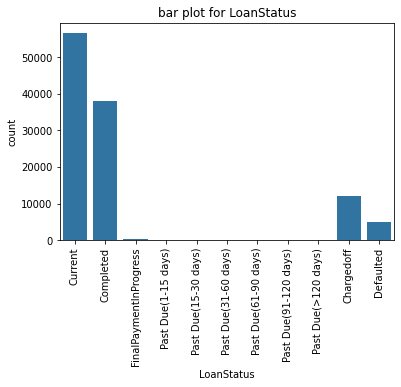

In [34]:
order=['Current','Completed','FinalPaymentInProgress','Past Due(1-15 days)','Past Due(15-30 days)','Past Due(31-60 days)','Past Due(61-90 days)','Past Due(91-120 days)','Past Due(>120 days)','Chargedoff', 'Defaulted',]
sb.countplot(data=df,x='LoanStatus',order=order, color=base_color)
plt.title('bar plot for LoanStatus')
plt.xticks(rotation=90)
plt.xlabel('LoanStatus')


The above bar plot for the distribution of loan satus variable indicated that current loans are the most frequent in the data with over fifty thousand counts, followed by loans which are already completed, with almost fourty thousand counts. Chargeoff and defaulted loans comes next respectively. Past due and cancelled loans are the least frequent with nearly less than ten thouand counts.

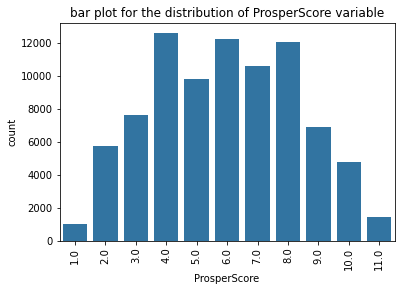

In [31]:
barplot('ProsperScore')

Prosper score variable takes integral values on a scale of 1 to 11. As such i found it good to visualize it using a bar plot. The distribution appears to be normaly distributed, with most and least frequent scores being 4 and 1 respectively.

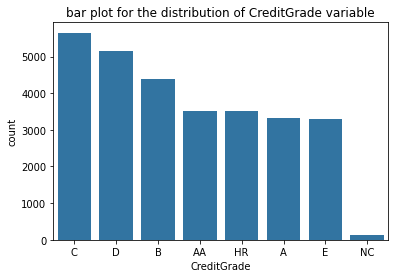

In [32]:

order=['']
sb.countplot(data=df, x='CreditGrade', color=base_color, order=order);
plt.title(f"bar plot for the distribution of CreditGrade variable")
plt.xlabel('CreditGrade');


#barplot('CreditGrade')

Borrowers with grade C creditgrade were the majority while those with NC credit grade were the minority in the data.

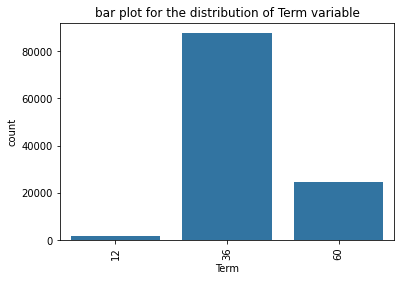

In [33]:
barplot("Term")

Most of the loans had a duration of 36 months while quite a few of them had a duration of 12 months.

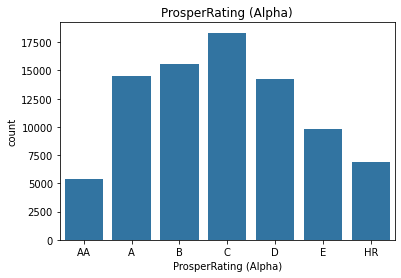

In [42]:
order=['AA','A', 'B', 'C', 'D', 'E', 'HR']
sb.countplot(data=df,x='ProsperRating (Alpha)', order=order, color=base_color);
plt.title('ProsperRating (Alpha)');

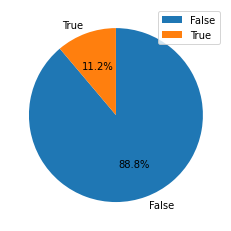

In [36]:
labs=df.CurrentlyInGroup.value_counts()
labs
plt.pie(labs, labels=labs.index, startangle=90, counterclock=False,autopct='%1.1f%%'); 
plt.legend()

Only 11.2 prcent of the borrowers were in group at the time of listing as depicted in the above pie chart.

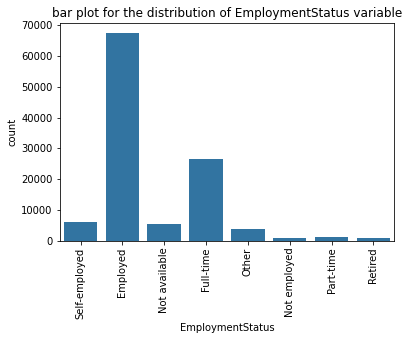

In [37]:
barplot('EmploymentStatus')


Most of the prospers were employed at the time the listing was posted, followed by full time  enployers. Merely less that  ten thousand of the prospers were unemployed, part time employed or  retired altogather at tthe time they posted the listing.

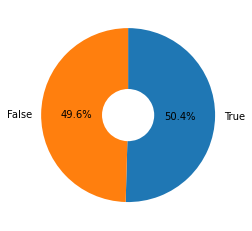

In [38]:
labs=df.IsBorrowerHomeowner.value_counts()
labs
plt.pie(labs, labels=labs.index, startangle=90, counterclock=False,autopct='%1.1f%%', wedgeprops={'width':0.7});

More than half of the borrowers had a morgage on their credit profile or  provided documentation confirming that they wer homeowners as can be seen in the above donut chart.

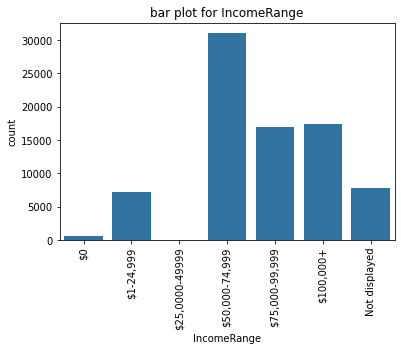

In [40]:
order=['$0', '$1-24,999', '$25,0000-49999', '$50,000-74,999','$75,000-99,999','$100,000+', 'Not displayed']
sb.countplot(data=df, x='IncomeRange',color=base_color, order=order)
plt.xticks(rotation=90)
plt.title('bar plot for IncomeRange');

At the time of listing, most of the borrowers were having an income ranging from  $25000$ to $49999$ , followed by those whose income ranges from $50000$ to $74999$ US dollars. Merely less than five thousand  porspers were unemployed or earned no income altogather.

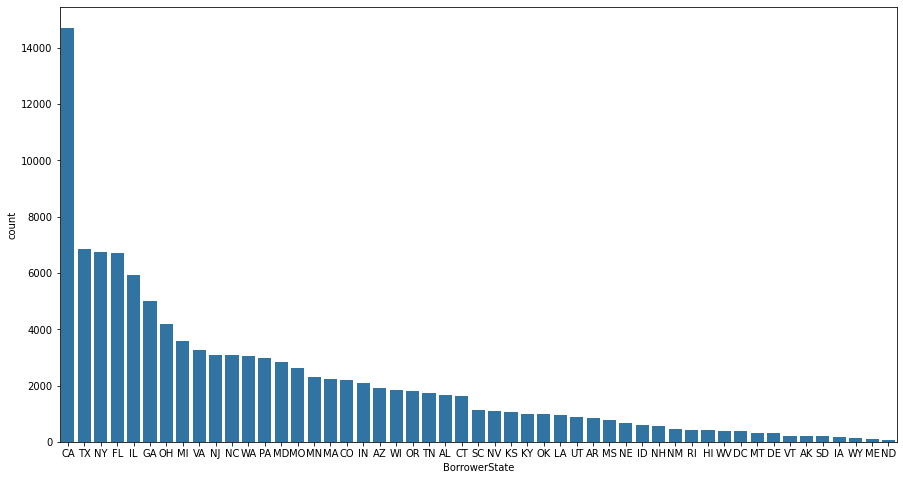

In [44]:
freq=df.BorrowerState.value_counts()
order=freq.index
plt.figure(figsize=[15,8])
sb.countplot(data=df,x='BorrowerState', order=order, color=base_color);


From the above bar plot, we can see that many borrowers were from the state of California during the time of listing. The state of Nevada had the least borrowers as it has the lowest number of counts.

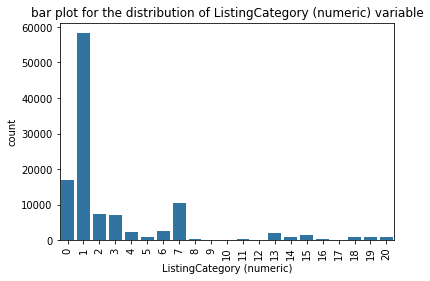

In [567]:
barplot('ListingCategory (numeric)')


Listing category variable reffers to the category of listing that the borrower selected when posting their listing.It takes on integral values on a scale of 0-20. Based on the bar chart, many propers selected category 1 (debt), followed by not available and other listing categories.

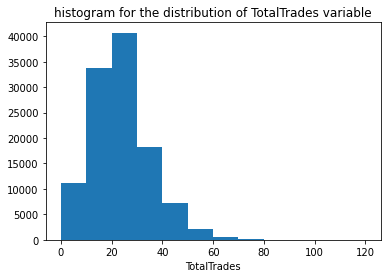

In [181]:
histogram('TotalTrades',rwidth=0.7)

The total trades variable is positively skewed as can be observed fotm the histogram above.

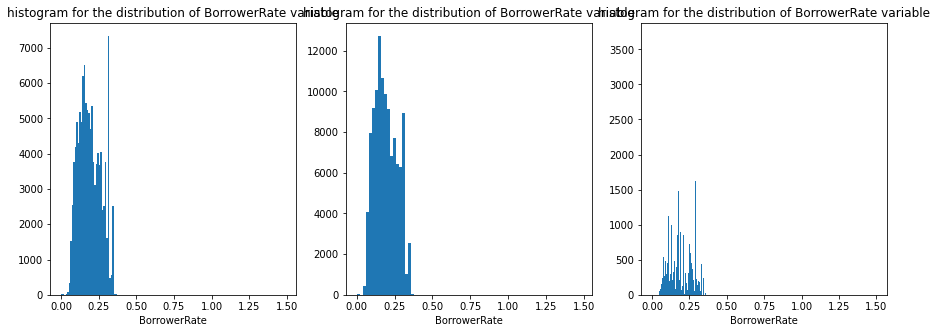

In [588]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
histogram('BorrowerRate',0.01 )
plt.subplot(1,3,2)
histogram('BorrowerRate',0.02)
plt.subplot(1,3,3)
histogram('BorrowerRate',0.001)


Borrower rate variable looks  kind of nornally distributed  for bin sizes of 0.1 to 0.3 on x-values within the range of (0.0 -0.4). Lower bin sizes which are beyond 0.01 however depict the possibility of bimodal distribution of the data.

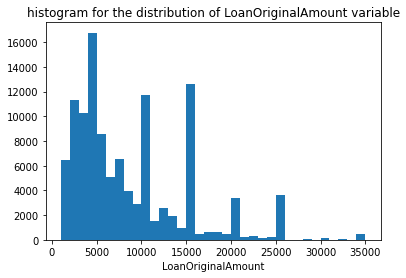

In [45]:
histogram('LoanOriginalAmount',1000)

Loan original amount varibale looks somewhat skewed to the left. There are regular spikes  in  the plot after a certain interval. This may be suggesting possible bimodal or trimodal distribution of this variable. We'll however confirm this a bit later in the next sections.

#### Features with unusual distribution and any other operation to adjust the data


Loan original amount and borrower rate variables have been found to exhibit bimodality and trimodality in their distribution, as observed in their respective histograms at different bin sizes. We'll hawever confirm this a bit later.

###  Bivariate Exploration

violin plot showing the relationship between LoanStatus and BorrowerRate


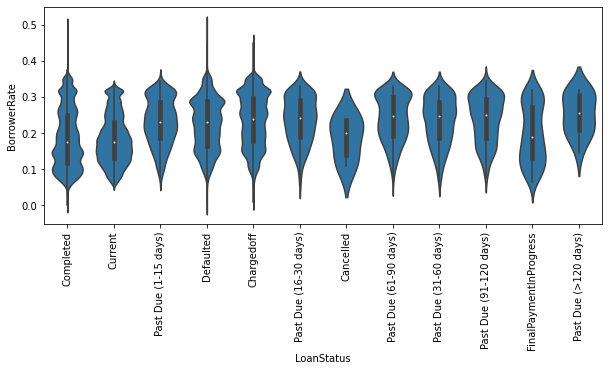

In [46]:
plt.figure(figsize=[10,4])
violin('LoanStatus','BorrowerRate')

###### Observation
Current loans are the most frequent in the data set followed by completed loan,chargedoffs, and finally defaulted loans.


#### Research questions
What factors influences the original amount of loan given to a borrower?
to answer this question, i used bivqariate visualization techniques to explore the relationship between different factors and the original loan amount given  to a proser. Below are some of these visualizations.

scattter plot showing the relationship between StatedMonthlyIncome and LoanOriginalAmount


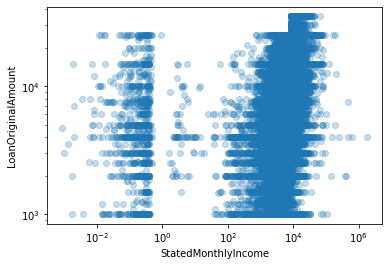

In [62]:
scatter('StatedMonthlyIncome','LoanOriginalAmount')
plt.xscale('log')
plt.yscale('log')

###### Observation
From above scatter plot, it is not clear to tell whether there is correlation beetween original loan amount and stated monthly income. We'll confirm this later using correlation coefficients.

scattter plot showing the relationship between ProsperRating (numeric) and LoanOriginalAmount


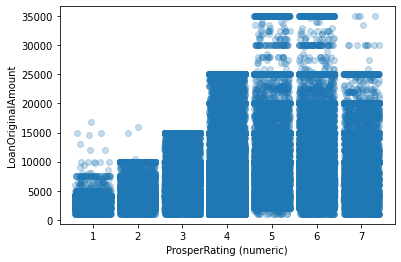

In [63]:
scatter('ProsperRating (numeric)','LoanOriginalAmount')

###### Obsarvation
From this scatter plot, there seems to be a positive linear correlation between prosper rating and loan original amount. This implies that loan amount given to the borrower tend to increase as the rating increase.

###### Question
Is there any relationship between prosper score and loan original amount?

scattter plot showing the relationship between ProsperScore and LoanOriginalAmount


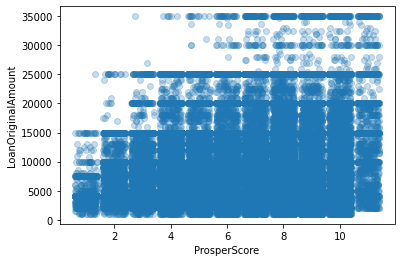

In [64]:
scatter('ProsperScore','LoanOriginalAmount')

###### Observation
The scatter plot above shows that there is a positive linear relationship between prosper score and the original loan amount borrowed. This implies that original loan amount borrowed tend to increase as the  prosper score of the borrower increase.

scattter plot showing the relationship between TotalProsperLoans and LoanOriginalAmount


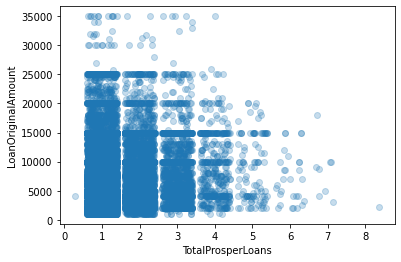

In [65]:
scatter('TotalProsperLoans','LoanOriginalAmount')

###### Observation
From tha above scatter plot, there seems to be a negative correlation between the original amount of loan given to a borrower and the total prosper loans. 

box plot showing the relationship between BorrowerState and LoanOriginalAmount


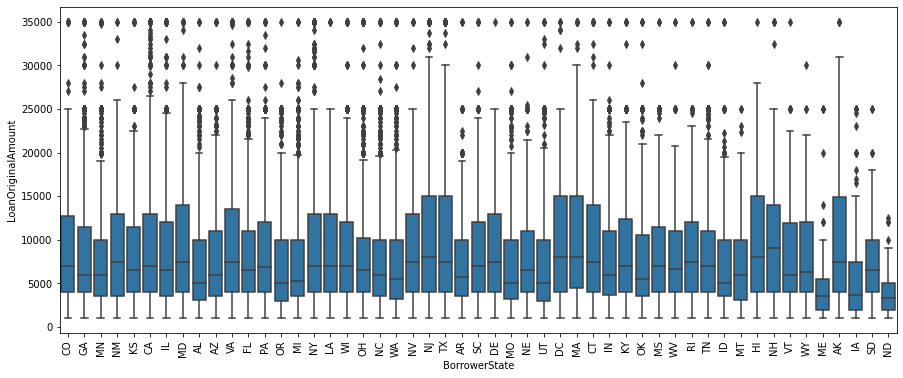

In [110]:
plt.figure(figsize=[15,6])
box('BorrowerState','LoanOriginalAmount')
plt.xticks(rotation=90);


######   observation
The box plot above shows that there are so many outliers in the two variables, hence their distribution are heavily tailed to the right. Also we can see that the borrower who was given the highest amount of loan was from the state of  New Jersey, with slightly above thirty thousand dollars. There are also many outliers who ought to be removed so as to enhance further statisical analyses.

###### Question
Is Is there any relationship between employment status and loan original amount?

box plot showing the relationship between EmploymentStatus and LoanOriginalAmount
violin plot showing the relationship between EmploymentStatus and LoanOriginalAmount


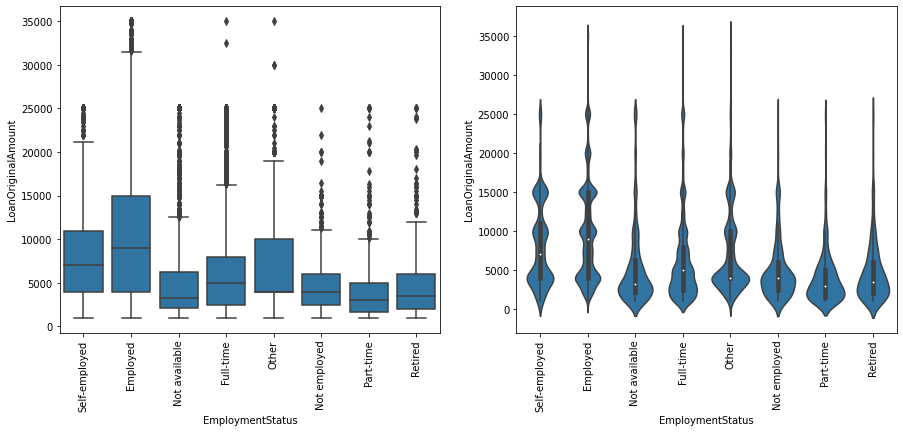

In [188]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
box("EmploymentStatus", "LoanOriginalAmount")
plt.xticks(rotation=90);
plt.subplot(1,2,2)
violin("EmploymentStatus", "LoanOriginalAmount")

###### Observation
Most of the prospers were employed, compared to those who were not employed.There are also many outlliers in the two variables that ought to be removed as can be seen in the aove box plot and violin  plot.

###### Question
Is there any correlation between employment status duration and loan original amount?

scattter plot showing the relationship between EmploymentStatusDuration and LoanOriginalAmount


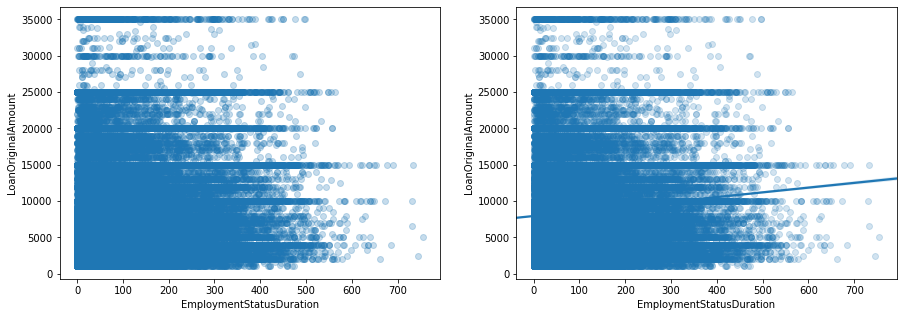

In [78]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
scatter('EmploymentStatusDuration', 'LoanOriginalAmount');
plt.subplot(1,2,2)
sb.regplot(data=df, x='EmploymentStatusDuration', y='LoanOriginalAmount', fit_reg=True, truncate=False, x_jitter=0.3,
           scatter_kws={"alpha":1/5});

###### Observation
From the scatter plot above, there is a linear positive relationshi between employment status duration and dloan original amount.

######  Question
Is there a relationship between borrower rate and loan original amount?

scattter plot showing the relationship between BorrowerRate and LoanOriginalAmount


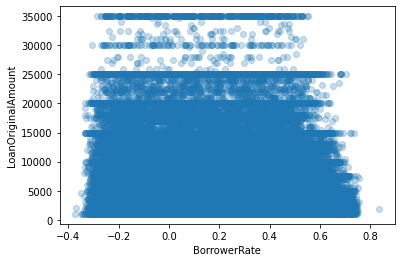

In [66]:
scatter('BorrowerRate', 'LoanOriginalAmount')

#####  Observations on the factors influencing the original loan amount  given to a borrower
After visualizing the relationship between the original loan amount and several variables, i've found out that some factors exhibit some correlation with the response variable (original loan amount).
However some of these relationships are not very visible hence the need for correlation tests to confirm if in deed there significat relationship between them. I've done the correlation plot below, from whic i find that:
Borrower APR, borrower Rate,lender yield,listing category, currently in group and recommendation variables are weakly and negatively correlated with the original loan amount given to a prosper as they have a negative correlation coefficiennt which are below -0.5. On the other hand, term, prosper rating,prosper score,is borrower home owner,employment status duration,total trades,stated monthly income and total prosper loans are wekly but positively correlated with the original amount of loan  a prosper can be given as their correlation coefficients are positive but belw 0.5 threshhold. Finally, monthly loan payment variable is very strongly and positively correalated with the original loan amount that a prosper can be given as it has a correlatin coefficient of 0.93.
Furthermore, there are several variables with many outliers. These outliers need to be removed as they tend to significantly affect statistical tests and inferences.

### Multivariate Exploration 
In this section, i came up with a couple of visualizations that depicts the relationships between the original amount of loan issued to a prosper against,  monthly loan payment and otther categorical variables.

###### How strong is the rerlationship between the numeric variables in the data?

After visualizing the relationship between the amount of loan given to a proser with various variables, i came up with a correlation matrix to detremine the strengths of these relatinships.

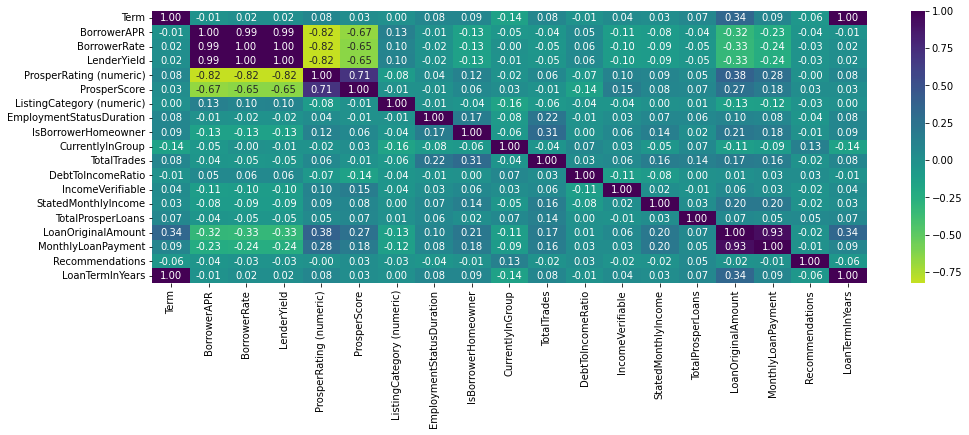

In [33]:
plt.figure(figsize=[16,5])
sb.heatmap(df.corr(), annot=True,fmt='.2f',cmap='viridis_r', center=0);

###### Observation

Above is a heatmap that displays the correlation between the numeric variables in the data. As my main response variable of interest is the original amount of loan borrowed by the prosper, i am considering the correlation between this variable with other variables.
We can clearly see that borrower APR, borrower Rate,lender yield,listing category, currently in group and recommendation variables are weakly and negatively correlated with the original loan amount given to a prosper as they have a negative correlation coefficiennt which are below -0.5. On the other hand, term, prosper rating,prosper score,is borrower home owner,employment status duration,total trades,stated monthly income and total prosper loans are wekly but positively correlated with the original amount of loan  a prosper can be given as their correlation coefficients are positive but belw 0.5 threshhold. Finally, monthly loan payment variable is very strongly and positively correalated with the original loan amount that a prosper can be given as it has a correlatin coefficient of 0.93.

##### What is the relationship between MonthlyLoanPayment, LoanOriginalAmount and whether the borrower is a homeowner?

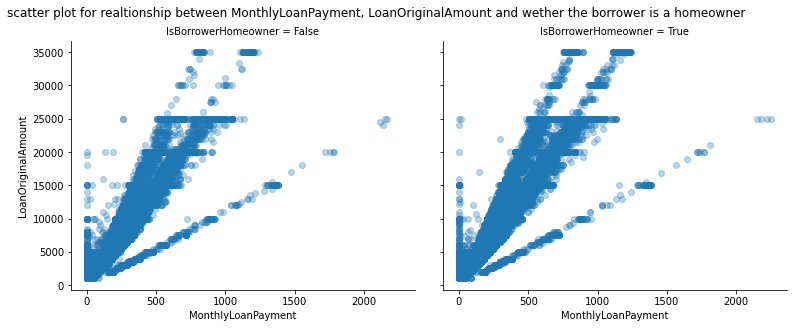

In [68]:
#cat_markers=[[True,"o"],
 #            [False,"s"]]

#for i, marker in cat_markers:
 #   df_cat=df[df['IsBorrowerHomeowner']==i]
 #   sb.regplot(data=df_cat, x='MonthlyLoanPayment', y='LoanOriginalAmount',
  #             marker=marker, fit_reg=False,scatter_kws={"alpha":0.99});
#plt.title("scatter plot for realtionship between MonthlyLoanPayment, LoanOriginalAmount and wether the borrower is a homeowner")
#plt.xlabel('MonthlyLoanPayment')
#plt.ylabel('LoanOriginalAmount')
#plt.legend([True,False]);
g=sb.FacetGrid(data=df, col="IsBorrowerHomeowner", col_wrap=2)
g.map(plt.scatter,'MonthlyLoanPayment','LoanOriginalAmount', alpha=0.3)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanOriginalAmount')
plt.suptitle("scatter plot for realtionship between MonthlyLoanPayment, LoanOriginalAmount and wether the borrower is a homeowner")
g.fig.set_size_inches(12,5)
plt.show()

#####  Observation
From the positional encodings in the above plot to depict the relationship between the three variables,we can see that there is a fair correlation between the two numerical variables (LoanOriginalAmount and Monthly loan payment). In addition, we ca see that individuals who are in the category of home owners are quite smaller than those wh are not home owners in terms  of numeric variable (monthly loan payment). Borrowers who are home owners also received a high amount of loan compared to those who are not owners.

#####  What is the relationship beetween monthly loan paymennt, loan original amount and employment status


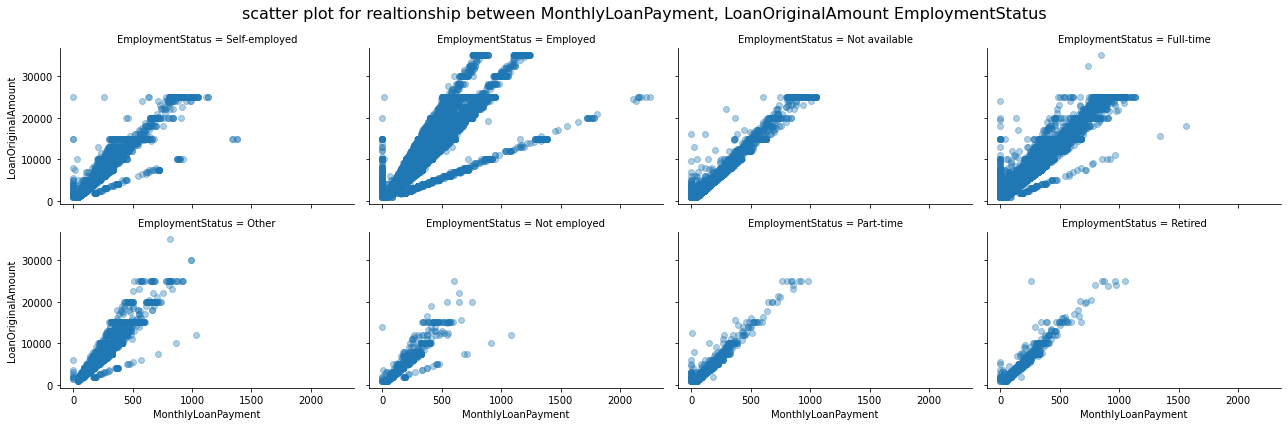

In [115]:
#fig=sb.FacetGrid(data=df, hue='EmploymentStatus')
#fig.map(sb.regplot,'MonthlyLoanPayment','LoanOriginalAmount', scatter_kws={'alpha':2/3}, x_jitter=0.3, fit_reg=False)
#fig.add_legend();
#plt.title("scatter plot for relationship between MonthlyLoanPayment,LoanOriginalAmount and employment status");
#plt.xscale('log')
#plt.yscale('log')

g=sb.FacetGrid(data=df, col="EmploymentStatus", col_wrap=4)
g.map(sb.regplot,'MonthlyLoanPayment','LoanOriginalAmount', x_jitter=0.5, scatter_kws={'alpha':0.36}, fit_reg=False)
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanOriginalAmount')
plt.suptitle("scatter plot for realtionship between MonthlyLoanPayment, LoanOriginalAmount EmploymentStatus", fontsize=16)
g.fig.set_size_inches(18,6)
plt.tight_layout()
plt.show()

######  Observation
From the above scatter plot, we can see that there exist a positive linear relationship between the two numeric variables i.e, MonthlyLoanPayment and LoanOriginalAmount. Futhermore, we can see that the third categorical variable (employment status) is also directly correlated with both of the numerical variables. In addition, we can see that borrowers who were employed received a high loan amount compared to the other categories.

#### Conclusions
From this first phase of data exploration ad visualization, i have done some data wrangling to clean up the data. I've also explored the distribution of several variables, form univariate, bivariate to ,multivariate distributions/viasualizations. These exporations have enhanced a deeper understanding of the data. i've also derrived usefull insights from the data, including the relationships between various variables of interest, which i can then proceed to polish in the second phase of the explanatory analysis/visualization.

In [598]:
df.to_csv('used_data.csv', index=False)

I am saving the subset data to aid in my explonatory analysis in part II, instead of subsetting the original data again.